In [ ]:
#!unzip "/content/drive/MyDrive/ml/dogidenti/dog-breed-identikfication.zip" -d "/content/drive/MyDrive/ml/dogidenti"u

## Multi-class Dog breed classification
1. Problem
2. Data
3. Evalution
4. Features

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
print("GPU","yes" if  tf.config.list_physical_devices("GPU") else "-no")

GPU yes


### Getting data ready- converting images into numerical data(np array)

In [ ]:
import pandas as pd
label_csv=pd.read_csv("/content/drive/MyDrive/ml/dogidenti/labels.csv")
label_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<Axes: >

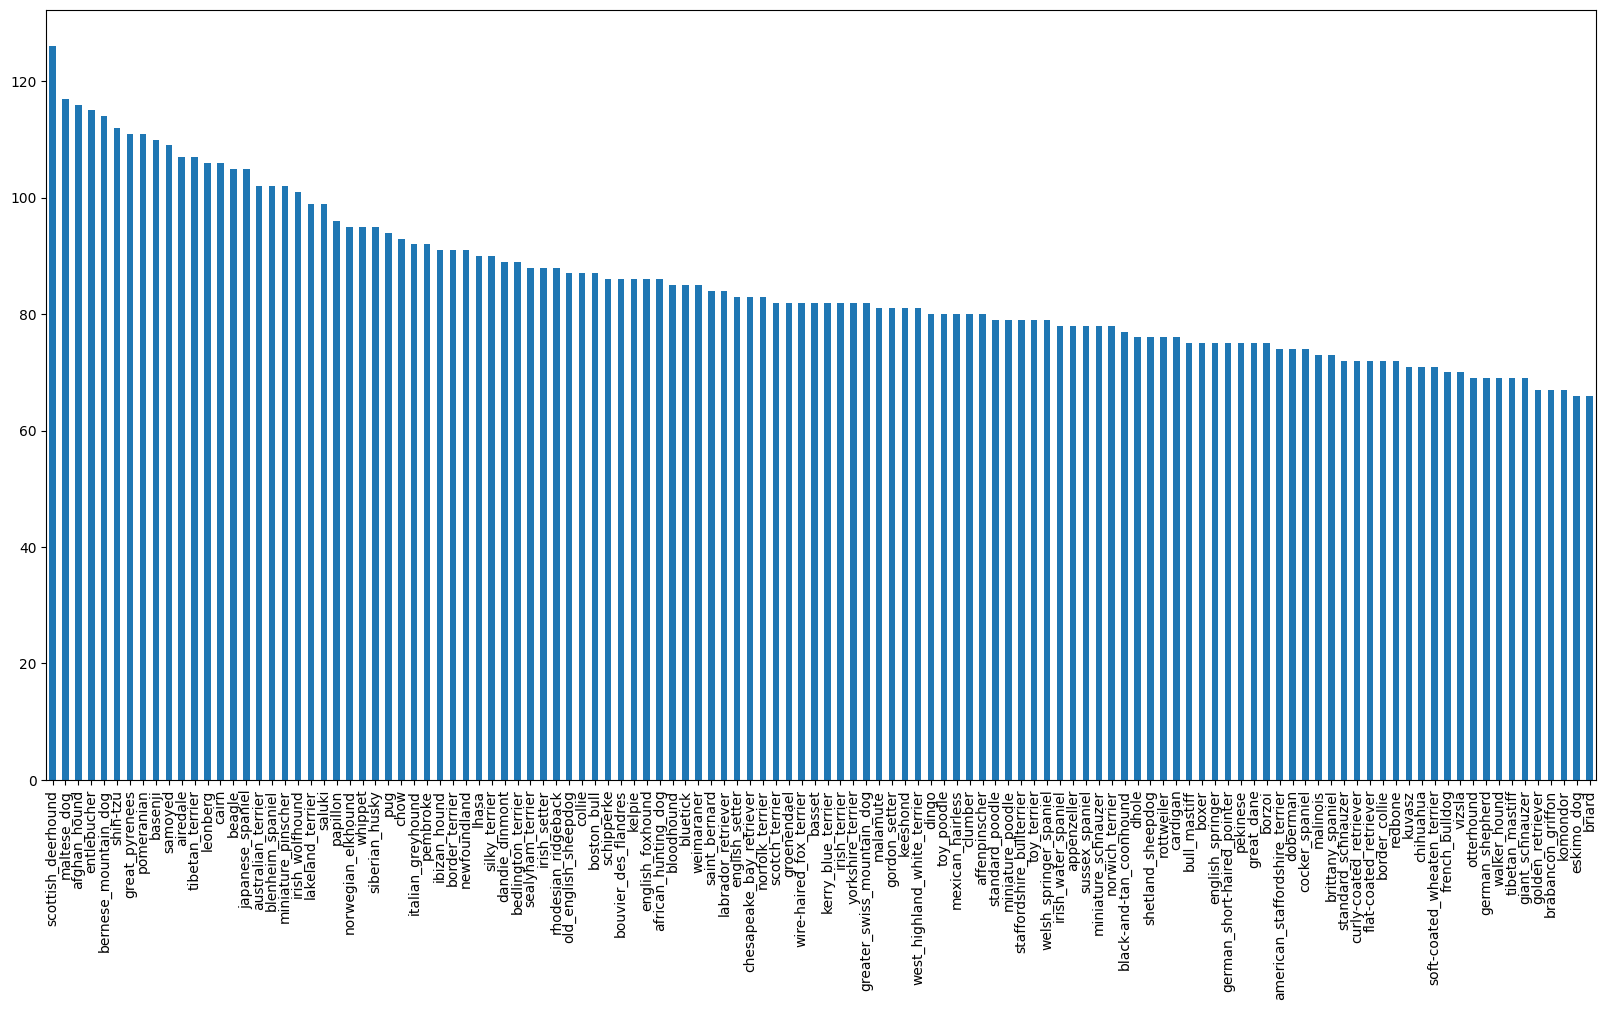

In [ ]:
label_csv["breed"].value_counts()
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

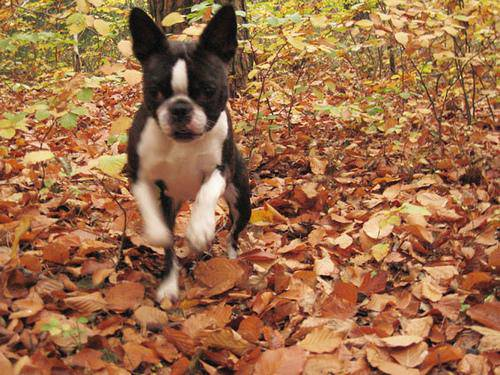

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/ml/dogidenti/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
paths=["drive/MyDrive/ml/dogidenti/train/"+f+".jpg" for f in label_csv["id"]]

In [ ]:
len(paths)

10222

In [ ]:
import os
os.listdir("drive/MyDrive/ml/dogidenti/train/")[:10]
len(os.listdir("drive/MyDrive/ml/dogidenti/train/"))

10222

In [ ]:
if len(os.listdir("drive/MyDrive/ml/dogidenti/train/")) == len(paths):
  print("good to ogoogooo")
else:
  print("recheckk")

good to ogoogooo


drive/MyDrive/ml/dogidenti/train/e20e32bf114141e20a1af854ca4d0ecc.jpg


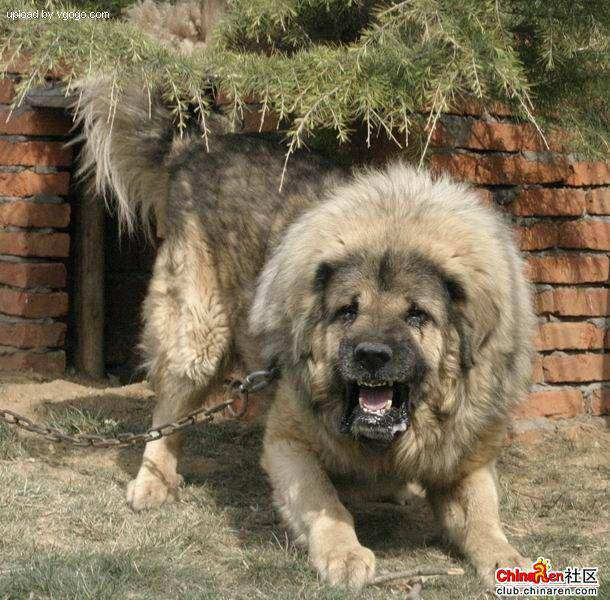

In [ ]:
print(paths[9000])
Image(paths[9000])

In [ ]:
label_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
#make a numpy array
import numpy as np
nplabel= label_csv["breed"].to_numpy()
nplabel
len(nplabel)

10222

In [ ]:
unique_breeds=np.unique(nplabel)
print(len(unique_breeds))
unique_breeds

120


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn every label into boolean of array
nplabel[0]==unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#list of boolean np arrays
boolean_labels=[label==unique_breeds for label in nplabel]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turning booolean arrays to integers
print(boolean_labels[0].astype(int))
print(boolean_labels[0].argmax())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
19


In [ ]:
boolean_numbers=[b.argmax() for b in boolean_labels]
boolean_numbers

[19,
 37,
 85,
 15,
 49,
 10,
 10,
 18,
 7,
 97,
 99,
 113,
 73,
 15,
 79,
 2,
 118,
 89,
 68,
 21,
 38,
 83,
 83,
 10,
 37,
 49,
 106,
 58,
 12,
 26,
 0,
 67,
 55,
 40,
 113,
 114,
 48,
 49,
 19,
 54,
 68,
 58,
 36,
 37,
 0,
 110,
 17,
 68,
 109,
 80,
 2,
 58,
 113,
 58,
 118,
 48,
 0,
 100,
 57,
 66,
 46,
 53,
 8,
 6,
 95,
 90,
 56,
 5,
 46,
 14,
 94,
 77,
 24,
 40,
 63,
 84,
 16,
 24,
 5,
 97,
 42,
 33,
 71,
 115,
 29,
 17,
 93,
 114,
 42,
 57,
 73,
 14,
 88,
 106,
 72,
 40,
 118,
 88,
 68,
 21,
 90,
 65,
 3,
 118,
 40,
 69,
 48,
 74,
 57,
 90,
 93,
 69,
 25,
 37,
 56,
 3,
 24,
 25,
 11,
 15,
 57,
 57,
 42,
 115,
 77,
 4,
 77,
 49,
 90,
 70,
 85,
 27,
 60,
 36,
 31,
 68,
 16,
 56,
 96,
 113,
 54,
 100,
 17,
 70,
 26,
 56,
 1,
 82,
 92,
 69,
 18,
 92,
 113,
 75,
 10,
 43,
 106,
 26,
 83,
 54,
 110,
 97,
 59,
 71,
 73,
 11,
 53,
 96,
 18,
 22,
 111,
 30,
 0,
 44,
 94,
 4,
 113,
 80,
 25,
 33,
 40,
 81,
 103,
 2,
 104,
 12,
 31,
 103,
 39,
 50,
 101,
 84,
 38,
 55,
 0,
 14,
 115,
 17,


In [ ]:
#Creating our own validation set
x= paths
y= boolean_labels
len(x)

10222

In [ ]:
#start exp with ~1000 images and addon as needed
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10222, step:1}

In [ ]:
# Lets split data into train and validation
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
print(len(x_train),len(x_val),len(y_train),len(y_val))

In [ ]:
from matplotlib.pyplot import imread
imag = imread(paths[0])
imag.shape
tf.constant(imag)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
# PREPROCESSING
# func for Turning images into tensors
# 1.input as file path
# 2.use tensorflow to save img in variable
# 3.turn img to tensor
# 4.resize img to (224,224)
# 5. return modeifies img
IMG_SIZE=224

def preprocessingimg(imagepath,img_size=IMG_SIZE):
  image=tf.io.read_file(imagepath)
  #turn jpeg into numerical tensor
  image = tf.image.decode_jpeg(image,channels=3)
  #normalisation-change color values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  #resize
  image= tf.image.resize(image,size=(IMG_SIZE,IMG_SIZE))
  return image

In [ ]:
# turning data into batches 32-batch size
# for effective results tuples inform of (image,label)
BATCHSIZE=32
def get_image_alabel(imagepath,label):
  image=preprocessingimg(imagepath)
  return (image,label)

In [ ]:
# turning data into batches 32-batch size
def create_data_batches(x,y=None,batch_size=BATCHSIZE,valid_data=False,test_data=False):
  #if data is testdata we wont have labels
  if test_data:
    print("test data batches, no labels")
    data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
    print(data)
    databatch = data.map(preprocessingimg).batch(BATCHSIZE)
    return databatch
  elif valid_data:
    print("valid data batches,no shuffling")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    databatch=data.map(get_image_alabel).batch(BATCHSIZE)
    return databatch
  else:
    print("training data,shuffling")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    databatch=data.map(get_image_alabel).batch(BATCHSIZE)
    return databatch

In [ ]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

training data,shuffling
valid data batches,no shuffling


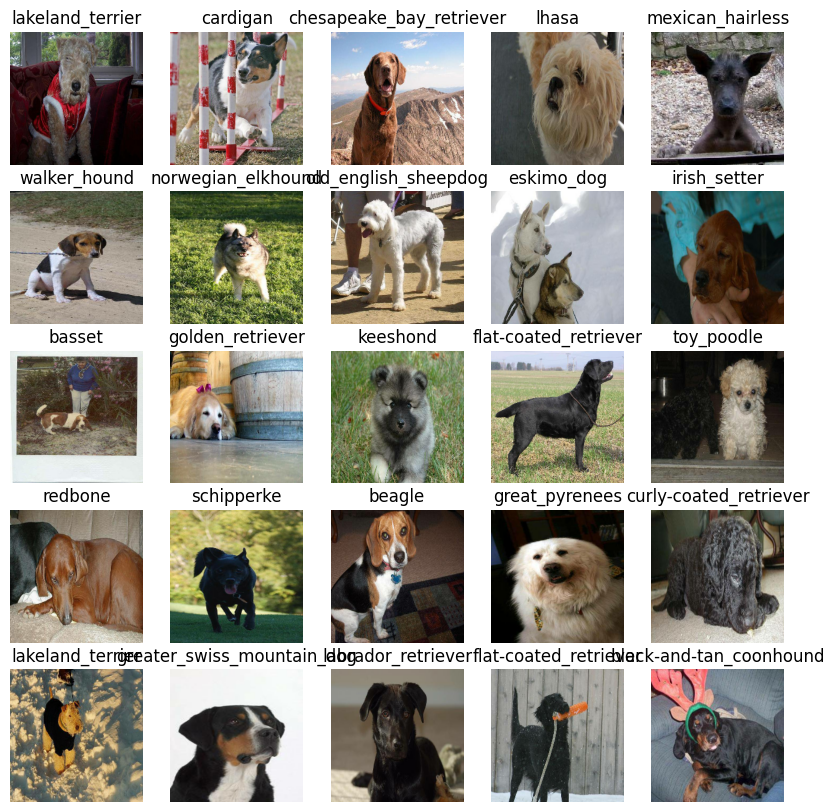

In [ ]:
#Vizualisation
import matplotlib.pyplot as plt
def show25images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    #gridlines off
    plt.axis("off")

train_images,train_labels=next(train_data.as_numpy_iterator())
show25images(train_images,train_labels)

In [ ]:
#Building a model
# 1 input shape in form of tensors
# 2 output shape in form of tensors
# 3 URL
import tensorflow_hub as hub

INPUTSHAPE= [None,IMG_SIZE,IMG_SIZE,3]#batch,height,width,columns

OUTPUTSHAPE= len(unique_breeds)

MODELURL = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

In [ ]:
#Create func which build keras model
def createmodel(inputshape=INPUTSHAPE,ouTputshape=OUTPUTSHAPE,model=MODELURL):
  print("creaying model")

  #setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODELURL),tf.keras.layers.Dense(units=OUTPUTSHAPE,activation="softmax")])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUTSHAPE)  # Batch input shape.
  return model

In [ ]:
modl=createmodel()
modl.summary()

creaying model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,628,953
Trainable params: 120,240
Non-trainable params: 5,508,713
_________________________________________________________________


In [ ]:
#creating call backs
#load tensorboard extension
%load_ext tensorboard


In [ ]:
import datetime
#func for tensorboard callback
def createtensorboardcallback():
  #log for storing tensorboard logs
  logdir= os.path.join("/content/drive/MyDrive/ml/dogidenti/logs",
                       #make it so that logs get tracked whenever we run a exp
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# func for early stoping if model stop improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [ ]:
#first we train only 1000 images
NUM_EPOCHS=100 #
#func for training model
def train_model(es=NUM_EPOCHS,):
  model = createmodel()

  tensorboard = createtensorboardcallback()

  model.fit(x=train_data,epochs=es,validation_data=val_data,validation_freq=1,callbacks=[tensorboard,early_stopping])
  return model

In [ ]:
model = train_model()

creaying model
Epoch 1/100
 5/25 [=====>........................] - ETA: 1:34 - loss: 5.4168 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
#checking tensorboard
#%tensorboard --logdir /content/drive/MyDrive/ml/dogidenti/logs

MAking and evaluating predinctions using trained data

In [ ]:
predic = model.predict(val_data,verbose=1)
predic

NameError: ignored

In [ ]:
np.sum(predic[2])
predic.shape

In [ ]:
index=5
print(f"max probalility: { np.max(predic[index]) }")
print( f"max index: {np.argmax(predic[index])}")
print(f"sum: {np.sum(predic[index])}")
print(f"dog name: {unique_breeds[np.argmax(predic[index])]}")

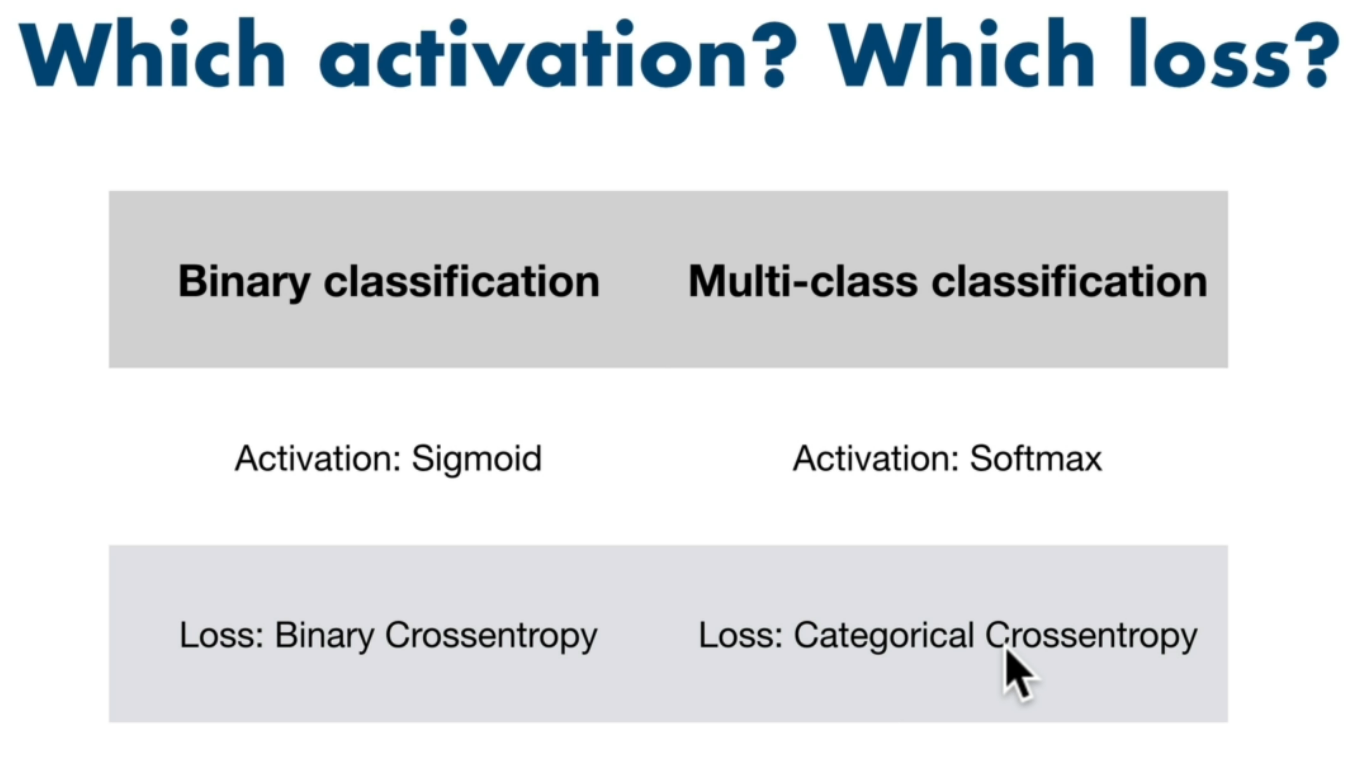

In [ ]:
def get_pred_label(probabilityprediction):
  return unique_breeds[np.argmax(probabilityprediction)]

# pred_label= get_pred_label(predic[0])
# pred_label

In [ ]:
val_data

In [ ]:
#func for unbachting datasets
def unbatchifi(se,imgs,labls):
  for im,la in se.unbatch().as_numpy_iterator():
    imgs.append(im)
    labls.append(la)
  return imgs,labls

In [ ]:
#unbatch the data
valimages_=[]
vallabels_=[]
for image,label in val_data.unbatch().as_numpy_iterator():
  valimages_.append(image)
  vallabels_.append(label)

valimages_[0].shape,vallabels_[0]

((224, 224, 3),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]))

In [ ]:
get_pred_label(vallabels_[0])

In [ ]:
get_pred_label(predic[0])

In [ ]:
#func that takes prob,true label ,an integer, label to give image,predicted label,truleabel
def plot_pred(proba,images,true,n=1):
  predl= get_pred_label(proba[n])
  truel= unique_breeds[np.argmax(true[n])]
  # t=np.sort(true[n],axis=None)[10]
  # toplist=[ unique_breeds[np.where(t==i)] for i in t]!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1111
  plt.imshow(images[n])
  plt.title(f"predicted:{predl}, truerate:{np.max(proba[n])}%,real:{truel}")

In [ ]:
plot_pred(proba=predic,images=valimages_,true=vallabels_,n=56)

In [ ]:
#func for top 10 confodences
def plot_pred_conf(proba,true,n=1):
  predl= get_pred_label(proba[n])
  truel= unique_breeds[np.argmax(true[n])]
  vallist= proba[n][proba[n].argsort()[-10:][::-1]] # top 10 and reversing
  blist = unique_breeds[proba[n].argsort()[-10:][::-1]]
  #plotting

  top_plot=plt.bar(blist,vallist,color="grey")
  plt.xticks(blist,labels=blist,rotation="vertical")
  if truel in blist:
    # print(blist)
    top_plot[np.argmax(blist==truel)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(proba=predic,true=vallabels_,n=56)

NameError: ignored

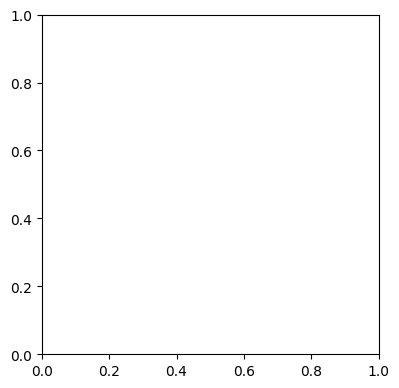

In [ ]:
#visualisinsg and evaluating
i_multiplier=0
n_rows=3
n_cols=2
n_images=n_cols*n_rows
plt.figure(figsize=(10*n_cols,5*n_rows))
for i in range(n_images):
  plt.subplot(n_rows,2*n_cols,2*i+1)
  plot_pred(proba=predic,images=valimages_,true=vallabels_,n=i+i_multiplier)
  plt.subplot(n_rows,2*n_cols,2*i+2)
  plot_pred_conf(proba=predic,true=vallabels_,n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

create a confusion matrix

In [ ]:
#saving and reloading a model
def savem(model,suffix=None):
  modeldir=os.path.join("/content/drive/MyDrive/ml/dogidenti/moels",datetime.datetime.now().strftime("%Y%m%d- %H%M%s"))
  modelpath =modeldir+"-"+ suffix +".h5"
  print(f"saving to {modelpath}")
  model.save(modelpath)
  return modelpath

In [ ]:
def loadm(modelpath,suffix=None):
  print(f"loding from {modelpath}")
  model=tf.keras.models.load_model(modelpath,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
savem(model,suffix="1000-images-mobilenetv3-Adam")

In [ ]:
loaded_1000=loadm("/content/drive/MyDrive/ml/dogidenti/moels/20230713- 15551689263706-1000-images-mobilenetv3-Adam.h5")

loding from /content/drive/MyDrive/ml/dogidenti/moels/20230713- 15551689263706-1000-images-mobilenetv3-Adam.h5


In [ ]:
model.evaluate(val_data)

NameError: ignored

In [ ]:
loaded_1000.evaluate(val_data)

7/7 [==============================] - 2s 197ms/step - loss: 1.3843 - accuracy: 0.6650


[1.3842822313308716, 0.6650000214576721]

CReating model on big data-full images

In [ ]:
len(x),len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(x,y)

training data,shuffling


In [ ]:
#creating full model
full_model = createmodel()

creaying model


In [ ]:
fullmodel_earlystopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)
fullmodel_tensorboard = createtensorboardcallback()

In [ ]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[fullmodel_tensorboard,fullmodel_earlystopping])

Epoch 1/100
320/320 [==============================] - 2297s 7s/step - loss: 1.4088 - accuracy: 0.6648
Epoch 2/100
320/320 [==============================] - 32s 100ms/step - loss: 0.3898 - accuracy: 0.8860
Epoch 3/100
320/320 [==============================] - 32s 99ms/step - loss: 0.2252 - accuracy: 0.9398
Epoch 4/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1415 - accuracy: 0.9672
Epoch 5/100
320/320 [==============================] - 31s 97ms/step - loss: 0.0965 - accuracy: 0.9818
Epoch 6/100
320/320 [==============================] - 31s 98ms/step - loss: 0.0676 - accuracy: 0.9912
Epoch 7/100
320/320 [==============================] - 32s 101ms/step - loss: 0.0531 - accuracy: 0.9936
Epoch 8/100
320/320 [==============================] - 33s 102ms/step - loss: 0.0396 - accuracy: 0.9974
Epoch 9/100
320/320 [==============================] - 31s 98ms/step - loss: 0.0341 - accuracy: 0.9973
Epoch 10/100
320/320 [==============================] - 33s 103ms/ste

In [ ]:
savem(full_model,suffix="full-dog-data-Adam-Mobilenetv3")

saving to /content/drive/MyDrive/ml/dogidenti/moels/20230726- 08441690361073-full-dog-data-Adam-Mobilenetv3.h5


'/content/drive/MyDrive/ml/dogidenti/moels/20230726- 08441690361073-full-dog-data-Adam-Mobilenetv3.h5'

In [ ]:
full_loded=loadm("/content/drive/MyDrive/ml/dogidenti/moels/20230726- 08441690361073-full-dog-data-Adam-Mobilenetv3.h5")

loding from /content/drive/MyDrive/ml/dogidenti/moels/20230726- 08441690361073-full-dog-data-Adam-Mobilenetv3.h5


In [ ]:
#create ttest data bacthes
testpath="/content/drive/MyDrive/ml/dogidenti/test/"
testfiles=[testpath + fname for fname in os.listdir(testpath)]
testfiles[:2]

['/content/drive/MyDrive/ml/dogidenti/test/df86ba50c4d0b597af0d23bda37eb10e.jpg',
 '/content/drive/MyDrive/ml/dogidenti/test/e073f14cd5f4c1a62cdb0108cca62fdd.jpg']

In [ ]:
len(testfiles)

10357

In [ ]:
testdata = create_data_batches(testfiles,test_data=True)

test data batches, no labels
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [ ]:
testdata

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
fullpred=full_model.predict(testdata,verbose=1)

324/324 [==============================] - 270s 769ms/step


In [ ]:
np.savetxt("/content/drive/MyDrive/ml/dogidenti/train/fullprediction.csv",fullpred,delimiter=",")

In [ ]:
import numpy as np
lodedfullpreds=np.loadtxt("/content/drive/MyDrive/ml/dogidenti/train/fullprediction.csv",delimiter=",")

In [ ]:
import pandas as pd
subm= pd.DataFrame(columns=["id"]+list(unique_breeds))
subm

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_ids= [os.path.basename(path)[:-4] for path in os.listdir(testpath)]
# test_ids= [os.path.splittext(path)[0] for path in os.listdir(testpath)]
test_ids[3]

'dcbe4226672aa4af80c1e52a9bb78268'

In [ ]:
subm["id"]=test_ids

In [ ]:
fullpred
subm

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,df86ba50c4d0b597af0d23bda37eb10e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e073f14cd5f4c1a62cdb0108cca62fdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e431adb273c1b705e6e85147990f355e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dcbe4226672aa4af80c1e52a9bb78268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e47de0441a48f2eff7c2faacd350ed06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,078a52db2d156257696c771487a6a316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10353,089347d3bc5f6b4a4a7d38d10c8f5d90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10354,0820dacdc8a994a932d0bae3abd0a15b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10355,07fecc50840c8da8284ce5dc6552ae8e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subm[list(unique_breeds)]= fullpred
# for i in range(len(fullpred)):
  # subm.loc[test_ids[i]]=fullpred[i]
# len(unique_breeds)
# len(fullpred)

In [ ]:
subm

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,df86ba50c4d0b597af0d23bda37eb10e,0.007537,0.001588,0.011609,0.022807,0.019206,0.011580,0.006473,0.000458,0.005514,...,0.004352,0.000912,0.012959,0.004981,0.009668,0.003875,0.005878,0.000529,0.000773,0.001749
1,e073f14cd5f4c1a62cdb0108cca62fdd,0.000882,0.022233,0.004965,0.002833,0.006055,0.001890,0.006425,0.001205,0.010752,...,0.002465,0.004541,0.007078,0.003160,0.002214,0.001256,0.003749,0.002107,0.006454,0.004495
2,e431adb273c1b705e6e85147990f355e,0.002558,0.000135,0.020939,0.002627,0.007145,0.000407,0.004543,0.000526,0.000211,...,0.001505,0.004058,0.000663,0.000550,0.000575,0.002972,0.000676,0.000300,0.000484,0.001354
3,dcbe4226672aa4af80c1e52a9bb78268,0.001163,0.000708,0.002159,0.044595,0.003836,0.000587,0.001697,0.013027,0.010171,...,0.000760,0.002071,0.015696,0.010712,0.007051,0.002411,0.010040,0.006006,0.011037,0.007323
4,e47de0441a48f2eff7c2faacd350ed06,0.000104,0.015423,0.006091,0.004550,0.000901,0.003021,0.009307,0.000879,0.000388,...,0.000453,0.001551,0.056634,0.009498,0.001814,0.000827,0.000772,0.000432,0.000795,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,078a52db2d156257696c771487a6a316,0.000579,0.003155,0.064061,0.028915,0.011837,0.002713,0.015297,0.000699,0.008674,...,0.014725,0.000551,0.015822,0.009457,0.006578,0.005048,0.002641,0.002119,0.001229,0.000913
10353,089347d3bc5f6b4a4a7d38d10c8f5d90,0.001057,0.001292,0.000678,0.006786,0.004927,0.002565,0.004221,0.012490,0.000344,...,0.000435,0.002794,0.015412,0.003350,0.063236,0.000397,0.006639,0.014105,0.011265,0.001903
10354,0820dacdc8a994a932d0bae3abd0a15b,0.002279,0.009147,0.010276,0.046381,0.001345,0.003589,0.000686,0.005565,0.013458,...,0.002463,0.002036,0.015751,0.001383,0.010030,0.011229,0.003005,0.000448,0.000778,0.004310
10355,07fecc50840c8da8284ce5dc6552ae8e,0.001956,0.004077,0.015273,0.050571,0.002983,0.005109,0.001192,0.013819,0.003841,...,0.003751,0.002812,0.000715,0.005247,0.001661,0.003500,0.016304,0.004754,0.001166,0.005224


import numpy as np
from google.colab import autoviz
df_2001746499578485652 = autoviz.get_df('df_2001746499578485652')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2001746499578485652, *['affenpinscher'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1408990935928016224 = autoviz.get_df('df_1408990935928016224')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1408990935928016224, *['afghan_hound'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6051907307096254527 = autoviz.get_df('df_6051907307096254527')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6051907307096254527, *['african_hunting_dog'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5141745555219361627 = autoviz.get_df('df_5141745555219361627')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5141745555219361627, *['airedale'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8221058238462774200 = autoviz.get_df('df_8221058238462774200')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8221058238462774200, *['affenpinscher'], **{})
chart

import numpy as np
from google.colab import autoviz
df_681316624871101949 = autoviz.get_df('df_681316624871101949')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_681316624871101949, *['afghan_hound'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5724032847698471272 = autoviz.get_df('df_5724032847698471272')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5724032847698471272, *['african_hunting_dog'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6555486948497836846 = autoviz.get_df('df_6555486948497836846')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6555486948497836846, *['airedale'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7175958175621519237 = autoviz.get_df('df_7175958175621519237')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7175958175621519237, *[[['affenpinscher', 'afghan_hound'], ['afghan_hound', 'african_hunting_dog'], ['african_hunting_dog', 'airedale'], ['airedale', 'american_staffordshire_terrier']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
subm.to_csv("/content/drive/MyDrive/ml/dogidenti/fullpred1-mobilenetv3.csv",index=False)

In [ ]:
#making preds on custom images
custompath="/content/drive/MyDrive/ml/dogidenti/customdog/"
customimgs=[custompath + f for f in os.listdir(custompath)]
customimgs[:-1]

['/content/drive/MyDrive/ml/dogidenti/customdog/dog1.jpeg',
 '/content/drive/MyDrive/ml/dogidenti/customdog/dog2.jpeg']

In [ ]:
datab=create_data_batches(customimgs[:-1],test_data=True)

test data batches, no labels
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [ ]:
custompreds=full_loded.predict(datab)

1/1 [==============================] - 1s 671ms/step


In [ ]:
custompredlabels= [get_pred_label(custompreds[i]) for i in range(2)]
custompredlabels

['golden_retriever', 'german_shepherd']